# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Files in any other format but mentioned above will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 7 March, 2022, midnight.** 

## Exercises

This homework focuses on **data understanding and preparation** for a particular problem and dataset.
The data comes from the Residential Property Price Register (RPPR) (https://www.propertypriceregister.ie/website/npsra/pprweb.nsf/page/ppr-home-en). The Residential Property Price Register is produced by the Property Services Regulatory Authority (PSRA). It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, as declared to the Revenue Commissioners for stamp duty purposes. In this analysis, **we focus on using the data collected by RPPR to build a data analytics solution for residential property price prediction**. 

Each student will work with a different subset of the data collected in a CSV file. The CSV file is named using the format: **ppr-[your-student-number].csv**, e.g., **ppr-12345678.csv** is the data file for a student with id 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1Zs1qvajZC_HfUPdM-oox4MUYY838OV2p?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.

    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as  continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Check the logical integrity of your data. 
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file. The PDF report         should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make the report long for the sake of length,  but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to  list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plots or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.
    
(4). [15] Create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. You can do this by adding new data from external data sources relevant to this prediction problem, or by transforming, extending or combining the existing features. Justify the steps and choices you are making by using tables or plots to make convincing arguments. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
# load dataset
df = pd.read_csv('PPR-ALL.csv', encoding = 'unicode_escape')

/var/folders/bn/6x11zktd6n14vfwyb0jymgt00000gp/T/ipykernel_73399/4033051617.py:2: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PPR-ALL.csv', encoding = 'unicode_escape')


In [3]:
# show dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596528 entries, 0 to 596527
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  596528 non-null  object
 1   Address                    596528 non-null  object
 2   County                     596528 non-null  object
 3   Eircode                    91579 non-null   object
 4   Price ()                  596528 non-null  object
 5   Not Full Market Price      596528 non-null  object
 6   VAT Exclusive              596528 non-null  object
 7   Description of Property    596528 non-null  object
 8   Property Size Description  52816 non-null   object
dtypes: object(9)
memory usage: 41.0+ MB


## 1 - Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.

<b> - Check how many rows and columns your CSV has. </b>

In [4]:
# Check how many rows and columns this dataframe has
df.shape

(596528, 9)

 <b> - Print the first and the last 5 rows. </b>

In [5]:
#check first 5 rows
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,"343,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,"185,000.00",No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,"438,500.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,"400,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,"160,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


In [6]:
#check last 5 rows
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
596523,05/05/2023,"Palmersgate, Kennelsfort Road Lower, Palmerstown",Dublin,NaN,"2,116,150.75",No,No,New Dwelling house /Apartment,NaN
596524,05/05/2023,"PARK RD, SWINFORD, MAYO",Mayo,F12F992,"190,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
596525,05/05/2023,"SPRING COTTAGE, SHALLON, THE WARD",Dublin,D11P582,"740,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
596526,05/05/2023,"THE ORCHARD, GARRYHILL, CARLOW",Carlow,R21H683,"375,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
596527,05/05/2023,"TULLYCROSS MOYDRUM, ATHLONE, WESTMEATH",Westmeath,N37TY28,"381,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


- Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types).

In [7]:
#Firstly look at column names
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'County', 'Eircode',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [8]:
#Clean the column names to remove white space after the name or in the name
df.columns = df.columns.str.replace(' ', '')

#Look at column names
df.columns

Index(['DateofSale(dd/mm/yyyy)', 'Address', 'County', 'Eircode', 'Price()',
       'NotFullMarketPrice', 'VATExclusive', 'DescriptionofProperty',
       'PropertySizeDescription'],
      dtype='object')

In [9]:
#Now check type of each feature
df.dtypes

DateofSale(dd/mm/yyyy)     object
Address                    object
County                     object
Eircode                    object
Price()                   object
NotFullMarketPrice         object
VATExclusive               object
DescriptionofProperty      object
PropertySizeDescription    object
dtype: object

Date of Sale (dd/mm/yyyy) should have datetime data.   I might create two separate columns later that identify both the date and month, in which case it will be useful to have datetime data.   Datetime data will make it possible to plot this feature on a histogram.

In [10]:
#convert date of sale data from string to datetime data type
df['DateofSale(dd/mm/yyyy)'] = pd.to_datetime(df['DateofSale(dd/mm/yyyy)'], format="%d/%m/%Y")


I will rename the date and price columns to remove special characters, making them easier to manipulate.

In [11]:
# rename columns
df = df.rename({'Price()': 'Price', 'DateofSale(dd/mm/yyyy)': 'DateofSale'}, axis='columns')
df.columns

Index(['DateofSale', 'Address', 'County', 'Eircode', 'Price',
       'NotFullMarketPrice', 'VATExclusive', 'DescriptionofProperty',
       'PropertySizeDescription'],
      dtype='object')

Price(€) data is currently string data when it should be of type float in order to be considered continuous data.   To convert this feature's data type, I will remove '€' from each row in the Price(€) column.

In [12]:
#remove '€' and ',' characters from each row of Price(€) and convert its data type to float
df['Price'] = df['Price'].replace('[\,)]','', regex=True)
df['Price'] = df['Price'].astype('float64')

In [13]:
# check first 5 rows
df.head(5)

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [14]:
#Check type of each feature
df.dtypes

DateofSale                 datetime64[ns]
Address                            object
County                             object
Eircode                            object
Price                             float64
NotFullMarketPrice                 object
VATExclusive                       object
DescriptionofProperty              object
PropertySizeDescription            object
dtype: object

<b> - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them. </b>

In [15]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])


Number of duplicate (excluding first) rows in the table is:  850
Number of duplicate rows (including first) in the table is: 1597


There appearse to be 850 duplicated rows. We will check duplicated data below and make sure this is correct and we can drop duplicated rows.

In [16]:
# show rows that have been duplicated and sort by address
df[df.duplicated(keep=False)].sort_values(by=['Address'])

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
246466,2017-03-16,"1 AN BRUACH, BALLYDESMOND, MALLOW",Cork,NaN,96500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
246467,2017-03-16,"1 AN BRUACH, BALLYDESMOND, MALLOW",Cork,NaN,96500.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN
418518,2020-03-18,"1 Belcamp Manor, Malahide Road, Balgriffin",Dublin,NaN,337500.0,Yes,Yes,New Dwelling house /Apartment,NaN
418519,2020-03-18,"1 Belcamp Manor, Malahide Road, Balgriffin",Dublin,NaN,337500.0,Yes,Yes,New Dwelling house /Apartment,NaN
442381,2020-10-15,"1 COURT DEVENISH, ATHLONE, WESTMEATH",Westmeath,N37YC98,134000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
2064,2010-02-18,"Wyanstown, Oldtown",Dublin,NaN,6350.0,No,No,Second-Hand Dwelling house /Apartment,NaN
40242,2012-01-23,"caherduggan, leamlara",Cork,NaN,300000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
40244,2012-01-23,"caherduggan, leamlara",Cork,NaN,300000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
10496,2010-07-16,"drumboy, mohill",Leitrim,NaN,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


Clearly data has been entered more than once in error since it is highly unlikely that a property has been sold more than once in a single day. We can drop these duplicates.

In [17]:
# drop duplicate rows
df = df.drop_duplicates()

In [18]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])


Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [19]:
# show new number of rows and columns after dropping duplicates
df.shape

(595678, 9)

In [20]:
# check cardinality of each feature
df.nunique()

DateofSale                   4605
Address                    542347
County                         26
Eircode                     89876
Price                       35166
NotFullMarketPrice              2
VATExclusive                    2
DescriptionofProperty           5
PropertySizeDescription         6
dtype: int64

Two columns, 'NotFullMarketPrice' and 'VATExclusive', appear to have the same cardinality and so it is possible that these could be a copy of each other. I will check whether these are duplicate columns. 

In [21]:
# create a series with a boolean value stating whether each row in the NotFullMarketPrice and VATEsclusive columns are equal
# and sum the results to give a number which indicates the amount of duplicate rows

(df['NotFullMarketPrice'] == df['VATExclusive']).sum()

479604

In [22]:
#check number of empty rows per feature
df.isnull().sum()

DateofSale                      0
Address                         0
County                          0
Eircode                    504162
Price                           0
NotFullMarketPrice              0
VATExclusive                    0
DescriptionofProperty           0
PropertySizeDescription    543099
dtype: int64

'NotFullMarketPrice' and 'VATExclusive' have 479,604 rows that have duplicate information.   This means they are not duplicate columns since they both have 595,678 non-empty rows.

<b> - Look for constant columns. Consider whether it makes sense to keep them or drop them. </b>

As seen above, each feature has a cardinality greater than 1.   This means there are no constant columns.

<b> - Logic check </b>

In [23]:
#check first 5 rows
df.head(5)

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2010-01-01,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


The first logical check I will make is that the addresses are within the range of 1/1/2010 until 5/5/2023.

In [24]:
#check first date of data entered
pd.DatetimeIndex(df['DateofSale']).min()

Timestamp('2010-01-01 00:00:00')

In [25]:
#check last date of data entered
pd.DatetimeIndex(df['DateofSale']).max()

Timestamp('2023-05-05 00:00:00')

In [26]:
#Double check row with latest date.
df[df['DateofSale'] == pd.DatetimeIndex(df['DateofSale']).max()]

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
596485,2023-05-05,"1 GRANGE VIEW DR, CLONDALKIN, DUBLIN 22",Dublin,D22TE24,300000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596486,2023-05-05,"1 OAKS AVE, CARRAIG AN AIRD, SIX CROSS ROADS",Waterford,X91HEE7,249000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596487,2023-05-05,"10 BARN ELMS, UPPER CHURCHTOWN ROAD, CHURCHTOWN",Dublin,NaN,995000.00,No,Yes,New Dwelling house /Apartment,NaN
596488,2023-05-05,"114 SCEILG ARD, HEADFORD RD, GALWAY",Galway,H91CP7X,295000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596489,2023-05-05,"147 Station Walk, Rickardstown, Newbridge",Kildare,NaN,352423.00,No,Yes,New Dwelling house /Apartment,NaN
596490,2023-05-05,"15 LAVEY MANOR DUBLIN RD, CHARLESTOWN, MAYO",Mayo,F12TK38,165000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596491,2023-05-05,"15 Rinn na Mara, Kinvara",Galway,H91A9WH,365638.76,No,Yes,New Dwelling house /Apartment,NaN
596492,2023-05-05,"154 MEADOW GROVE, DUNDRUM, DUBLIN 16",Dublin,D16YW59,645000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596493,2023-05-05,"16 FAIRYFIELD, PARTEEN, CLARE",Clare,V94A9N9,385000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
596494,2023-05-05,"18 REDINGTON WOODS, CLARINBRIDGE, GALWAY",Galway,H91W29T,770000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


There appears to be no problem with the dates entered.

In [27]:
#check cardinality of each feature
df.nunique()

DateofSale                   4605
Address                    542347
County                         26
Eircode                     89876
Price                       35166
NotFullMarketPrice              2
VATExclusive                    2
DescriptionofProperty           5
PropertySizeDescription         6
dtype: int64

We can see there are 9982 unique addresses in the data.   To make sure the same address is not listed in a different format or language, I would like to make sure they are all in English.   Irish addresses might affect retrieving location data if I choose to later.


In [28]:
df = df.reset_index(drop=True)

In [29]:
from pprint import pprint

#function to check if a string is in English 
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

#check each row of address and print addresses not in english
for i in range(len(df['Address'])):
    
    if isEnglish(df['Address'][i]) == False:
        print(df['Address'][i], ': Row', i)


6 Ard Thomain, Slí Na Manach, Mungret. : Row 2917
14 Cnocán Rua, Moycullen. : Row 3630
No.63 Páirc na gCapall, Kilworth. : Row 4315
No.17, Whitepoint Estate, Cóbh. : Row 5825
206 Cluain Rí, Ashbourne, Co. Meath. : Row 7440
No. 8 Cluain Árd, Dingle. : Row 7629
97 Leargán, Ballymoneen West, Galway. : Row 8591
73 Cregán, Barna, County Galway. : Row 8826
81 Leargán, Ballymoneen West, Galway. : Row 8828
15 Rory O'Connor Park, Dún Laoghaire. : Row 10023
No. 62 Inis Chláir, Kildysart Road, Ennis. : Row 10789
4 Radharc na bhFánaite, Killann, Enniscorthy. : Row 11257
28 Glen na Smól, Old Bawn, Tallaght. : Row 11567
6 Dun na Rí, Limerick Road, Ennis. : Row 11994
3 Cúil na Gréine, Church Hill, Glanmire. : Row 12846
10 Ard Rí, Drogheda. : Row 12989
Fáilte, South Shore Road, Rush. : Row 14937
Tig na bhFíle, Dromnea, Kilcrohane  Bantry. : Row 15106
2 Meehan's Terrace, Cóbh, Co Cork. : Row 15196
177 Cartúr Mór, Clybaun Road, Galway. : Row 15817
185 Fearann Rí, Doughiska, Galway. : Row 16812
1 Ardán, 

54 Crenigans Bánóg, Miltown Road, Ashbourne : Row 230438
APARTMENT 1B, GLEANN NA RÍ, RENMORE : Row 230672
19 DÚN CARRAIG CEIBH, LEITRIM VILLAGE, COUNTY LEITRIM : Row 230782
32 Drom Slí, Courtbrack, Blarney : Row 231096
28 CAISLEAN RÍ, TUAM ROAD, ATHENRY : Row 234328
13 Cluain Lárach, Knockenduff, Tramore : Row 239387
9 TRÁ GEAL, GARRYVOE, CO CORK : Row 239475
CORRÚCH, INIS MÓR, ARAN ISLANDS : Row 240069
14 BOTHAR ALBANACH, RANALLACH, BAILE ÁTHA CLIATH 6 : Row 241131
134 CLÓS NA LOCHÁN, STIGH LORGAN, CO. ÁTHA CLIATH : Row 243338
24 TRÁ GEAL, GARRYVOE, CO CORK : Row 244640
28 Lois NaGréine, Lisnennan, Letterkenny : Row 249308
71 SLÍ  AN CHOISTE, OLD TUAM RD, ATHLONE : Row 251541
7 SLÍ NA STRUTHAN, CLYBAWN ROAD, GALWAY : Row 252623
37 AVON RÍ, BLESSINGTON, CO. WICKLOW : Row 253125
3 COIS GLAISE, LIOS NA RÍ, SMITHS RD  CHARLEVILLE : Row 259094
1 AN GRIANÁN, RIVER ST, KILLENAULE : Row 260327
36 Réileán, Roscam, Galway : Row 260687
Doirín, UPPER BOLEY  SHANAHOE, ABBEYLEIX : Row 260876
10 Cno

26 An Glasán, Greenville Lane, Enniscorthy : Row 456241
66 Cluain Lárach, Knockenduff, Tramore : Row 456420
67 Cluain Lárach, Knockenduff, Tramore : Row 456422
9 Dún Ríoga Close, Dún Ríoga, Drumree Road : Row 457204
50 Dún Ríoga Crescent, Dún Ríoga, Drumree Road : Row 458764
2 The Close, An Glasán, Greenville Lane : Row 460292
78 CORRACH BUÍ, RAHOON, GALWAY : Row 460797
14 LUÍ NA GRÉINE, MITCHELSTOWN : Row 461599
ÁTHAN BUI, FALLEIGHTER, AGHAMORE : Row 463407
12 Doire feá, Kilrainey, Moycullen : Row 463471
2 SÚIOMH ÁLAINN, CHURCHGROUND, KILGARVAN : Row 464762
8 Dun na Rí, Swords Road, Malahide : Row 464871
48 ARDÁN NA MARA, SEAFIELD, YOUGHAL : Row 465148
5 GARRAI TOM TAIMIN, RATH CAIRN, ATH BUÍ : Row 465153
8 Árd Branagh, Heathfield, Dublin Road : Row 467421
96 Fánán, Letteragh Road, Rahoon : Row 467443
48 Árda na Deirge, Killaloe : Row 468094
92 Fánán, Letteragh Road, Galway : Row 468134
95 Fámán, LetteraghRoad, Galway : Row 468417
APARTMENT 6 TEACH BÁN, 4/5 LIBERTY SQUARE, THURLES : R

NO.5 BEACON WHARF, ÁVILA, CONVENT GARDEN KINSALE : Row 577218
1 AN GRIANÁN, RIVER ST, KILLENAULE : Row 577270
16  TRÁ AN FHIONA, BAILE AN REANNAIG, BAILE AN FHEIRTEARAIG : Row 577810
16 Slí na Craoibhe, Clybaun Road : Row 578331
APT 10 LOCHÁN, CASTLEGAR, HEADFORD ROAD : Row 578697
12 ASCAILL SAM SÉAMUS, BÓTHAR CHLUAIN LIFE, BAILE ÁTHA CLIATH 3 : Row 578887
31 Clochán, Kilmeadan : Row 579038
APT 1 SLÍ NA MÓNA, MOSTRIM ROAD, BALLYMAHON : Row 579208
104 CORRACH BUÍ, BISHOP ODONNELL RD, GALWAY : Row 580076
47 Clochán, Kilmeadan, Co. Waterford : Row 580498
NO 1 CLACHAN MÓR, LETTERKENNY, CO. DONEGAL : Row 581553
63 Gleann na Móna, Ballymoneehn Road, Knocknacarra : Row 581678
7 ELM PARK, DÚN AN ÓIR, KANTURK : Row 581682
1 An Páirc, Wotton  The Ward, Ashbourne : Row 581918
21 DÚN NA HINSE, LAHINCH ROAD, ENNIS : Row 582161
47 The Blake, Fánán, Letteragh Road : Row 582468
LÁNA NA HEAGLAISE, DAMHLIAG, CONTAE NA MÍ : Row 582818
APARTMENT 10, CÚIRT UISCE, DOUGHISKA ROAD : Row 582982
6 Dún Riabhach 

2  Páirc Darach, Elphin Road, Carrick.on.Shannon : Row 82289
4 Páirc Darach, Cortober, Carrick-on-Shannon : Row 85105
21 DÚN RÍ, ATTRIORY, CARRICK ON SHANNON : Row 142334

37 TARA COVE, BAILE BRIGIN, CO ÁTHA CLIATH : Row 92367
26 CEIDE BHREANAINN, AN CHULOG, BAILE ÁTHA CLIATH 5 : Row 95416
19 BOTHAR AN FHAICHE, AN CHARRAIG DHUBH, CO BHAILE ÁTHA CLIATH : Row 100336
51 CLEVEDON UACHTARACH, CARRAIG UÍ LEIGHIN, CO CHORCAÍ : Row 123067
9 ARDÁN MARINA, BOTHAR ALBERT, CORCAI : Row 127524
59 BARTON RD EAST, DUBLIN 14, BAILE ÁTHA CLIATH : Row 129744
10 CÉIDE ROCKVILLE, AN CHARRIG DHUBH, CO ÁTHA CLIATH : Row 147060
13 BEITHE GEALA, LÁNA BEITHE, DÚN DROMA : Row 161421
LIOS NA SI, COILLÍN, CILL MHÁILLE : Row 164872
164 FAICHE FHEARCHAIR, BAILE ÁTHA CLIATH 2 : Row 187033
19 ASCAL CHNOC NA RÓS, BR CHEANNAIS, CILL CHAINNIGH : Row 220051
16 BÓTHAR GHABHALMHAÍ, AN CHABRACH, BAILE ÁTHA CLIATH 7 : Row 225342
76 BREMORE DR, BAILE BRIGIN, CO ÁTHA CLIATH : Row 227004
14 BOTHAR ALBANACH, RANALLACH, BAILE ÁTHA CLIATH 6 : Row 241131
134 CLÓS NA LOCHÁN, STIGH LORGAN, CO. ÁTHA CLIATH : Row 243338

There are 16 addresses contain Irish language words.   Upon further inspection, I can see that 14 of these addresses are a combination of English and Irish, which leads me to believe that these addresses are the same in English as they are in Irish and it would not make sense to try and change them to their literal English translation.   However, 2 addresses, in rows 6646 and 5663, contain the Irish translation of 'Dublin' and so it would make sense to translate them to English so that they are consistent with the rest of the data.

In [30]:
# change address values to upper case for readability, easier string identification and consistent formatting
df['Address'] = df['Address'].str.upper()
df.head(5)

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2010-01-01,"5 BRAEMOR DRIVE, CHURCHTOWN, CO.DUBLIN",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2010-01-03,"134 ASHEWOOD WALK, SUMMERHILL LANE, PORTLAOISE",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,2010-01-04,"1 MEADOW AVENUE, DUNDRUM, DUBLIN 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2010-01-04,"1 THE HAVEN, MORNINGTON",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2010-01-04,"11 MELVILLE HEIGHTS, KILKENNY",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


I will now check the unique values of other features with low cardinality and make sure they are logical.

In [31]:
# check unique values for County feature
county_array = []
for i in df['County'].unique():
    county_array += [i]
print(county_array)

['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow', 'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow', 'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway', 'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath', 'Monaghan', 'Leitrim']


County values are entered correctly, with all 26 counties in the Republic of Ireland represented.

In [32]:
# check unique values for NotFullMarketPrice feature
df['NotFullMarketPrice'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
# check unique values for VATExclusive feature
df['VATExclusive'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
# check unique values for DescriptionofProperty feature
df['DescriptionofProperty'].unique()


array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe',
       'Teach/Árasán Cónaithe Nua', 'Teach/?ras?n C?naithe Nua'],
      dtype=object)

There are three categories in Irish for this feature, I will change them to the English translation which are the same as 'Second-Hand Dwelling house /Apartment' and 'New Dwelling house /Apartment'.

In [35]:
# Change value to english translation
df['DescriptionofProperty'] = df['DescriptionofProperty'].replace('Teach/Árasán Cónaithe Atháimhe', 
                                      'Second-Hand Dwelling house /Apartment',regex=True)
df['DescriptionofProperty'] = df['DescriptionofProperty'].replace('Teach/Árasán Cónaithe Nua', 
                                      'New Dwelling house /Apartment',regex=True)


In [36]:
# show property descriptions that are still in Irish
df[(df['DescriptionofProperty'] != 'Second-Hand Dwelling house /Apartment') & (df['DescriptionofProperty'] != 'New Dwelling house /Apartment')]

,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
39675,2012-01-12,"APARTMENT 12 BLOCK B, COROFIN HOUSE CLARE VI...",Dublin,NaN,115045.0,No,Yes,Teach/?ras?n C?naithe Nua,n?os l? n? 38 m?adar cearnach


In [37]:
# change one row to English description
df.at[39675, 'DescriptionofProperty'] = 'New Dwelling house /Apartment'

In [38]:
#check cardinality of feature
df['DescriptionofProperty'].nunique()

2

In [39]:
#check unique values for PropertySizeDescription feature
df['PropertySizeDescription'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres',
       'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

Two values, 'greater than 125 sq metres' and 'greater than or equal to 125 sq metres', should fall under the same category so I will combine the two. 'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach' and 'n?os l? n? 38 m?adar cearnach' should also be translated to English.

In [40]:
# replace value to reduce cardinality
df['PropertySizeDescription'] = df['PropertySizeDescription'].replace('greater than 125 sq metres', 
                                      'greater than or equal to 125 sq metres',regex=True)

In [41]:
# replace to English translations
df['PropertySizeDescription'] = df['PropertySizeDescription'].replace('níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach', 
                                      'greater than or equal to 38 sq metres and less than 125 sq metres',regex=True)
df['PropertySizeDescription'] = df['PropertySizeDescription'].replace('n?os l? n? 38 m?adar cearnach', 
                                      'less than 38 sq metres',regex=True)
df['PropertySizeDescription'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than or equal to 125 sq metres', 'less than 38 sq metres',
       'n?os l? n? 38 m?adar cearnach'], dtype=object)

In [42]:
# show property descriptions that are still in Irish
df[(df['PropertySizeDescription'] != 'greater than or equal to 38 sq metres and less than 125 sq metres') & (df['PropertySizeDescription'] != 'greater than or equal to 125 sq metres')
  & (df['PropertySizeDescription'] != 'less than 38 sq metres')& (df['PropertySizeDescription'].notnull())]




,DateofSale,Address,County,Eircode,Price,NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
39675,2012-01-12,"APARTMENT 12 BLOCK B, COROFIN HOUSE CLARE VI...",Dublin,NaN,115045.0,No,Yes,New Dwelling house /Apartment,n?os l? n? 38 m?adar cearnach


In [43]:
# change one row to English description
df.at[39675, 'PropertySizeDescription'] = 'less than 38 sq metres'

In [44]:
# check cardinality of feature
df['PropertySizeDescription'].nunique()

3

In [45]:
# check types
df.dtypes

DateofSale                 datetime64[ns]
Address                            object
County                             object
Eircode                            object
Price                             float64
NotFullMarketPrice                 object
VATExclusive                       object
DescriptionofProperty              object
PropertySizeDescription            object
dtype: object

Both EirCode and PropertySizeDescription still have a very high amount of empty rows. I will address this in the data quality plan.

<b> - Save your updated/cleaned data frame to a new csv file. </b>

In [46]:
# saving cleaned dataframe to a csv

df.to_csv("PPR-ALL_cleaned_section1.csv")

In [49]:
# convert all object data into categorical columns, except for address column
object_columns = list(df.select_dtypes(['object']).columns)
object_columns.remove('Address')
object_columns.remove('Eircode')

for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

DateofSale                 datetime64[ns]
Address                            object
County                           category
Eircode                            object
Price                             float64
NotFullMarketPrice               category
VATExclusive                     category
DescriptionofProperty            category
PropertySizeDescription          category
dtype: object

<b> - Prepare a table with descriptive statistics for all the continuous features. </b>


In [50]:
# I will need separate tables for the numeric and date columns as the nature of the descriptive statistics will be different
# I will start with the numeric columns

numeric_columns = df.select_dtypes(['float64', 'int64']).columns
numeric_columns


Index(['Price'], dtype='object')

In [51]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,595678.0,281362.668497,1.013935e+06,5001.0,126000.0,213656.39,322000.0,225000000.0


In [52]:
# Add cardinality column
numeric_columns_card = df[numeric_columns].nunique()

# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])

df_numeric_card

,card
Price,35166


In [53]:
# I will now create the table with descriptive statistics for the datetime columns
date_columns = df.select_dtypes(['datetime64[ns]']).columns
date_columns

Index(['DateofSale'], dtype='object')

In [54]:
df[date_columns].describe().T

,count,mean,min,25%,50%,75%,max
DateofSale,595678,2017-11-09 00:34:28.338934784,2010-01-01,2015-03-31,2018-02-16,2020-11-12,2023-05-05


In [55]:
# Add cardinality column
date_columns_card = df[date_columns].nunique()

# store the values in a dataframe
df_date_card = pd.DataFrame(date_columns_card, columns=['card'])

df_date_card

,card
DateofSale,4605


In [56]:
# Prepare %missing column
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
date_columns_missing  = 100 * (df[date_columns].isnull().sum()/df.shape[0])

# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_date_missing = pd.DataFrame(date_columns_missing, columns=['%missing'])
                

In [57]:
# Add missing values column
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
Price,595678.0,281362.668497,1.013935e+06,5001.0,126000.0,213656.39,322000.0,225000000.0,0.0,35166


In [58]:
# Add missing values column
df_table_date = df[date_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_date_columns_data_quality_report_table = pd.concat([df_table_date, df_date_missing, df_date_card], axis=1)

df_date_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,%missing,card
DateofSale,595678,2017-11-09 00:34:28.338934784,2010-01-01,2015-03-31,2018-02-16,2020-11-12,2023-05-05,0.0,4605


- Prepare a table with descriptive statistics for all the categorical features.


In [59]:
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['County', 'NotFullMarketPrice', 'VATExclusive', 'DescriptionofProperty',
       'PropertySizeDescription'],
      dtype='object')

In [60]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
County,26
NotFullMarketPrice,2
VATExclusive,2
DescriptionofProperty,2
PropertySizeDescription,3


In [61]:
# Prepare %missing column
category_columns_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

# store the values in a dataframe
df_category_missing = pd.DataFrame(category_columns_missing, columns=['%missing'])
df_category_missing

,%missing
County,0.000000
NotFullMarketPrice,0.000000
VATExclusive,0.000000
DescriptionofProperty,0.000000
PropertySizeDescription,91.173251


In [62]:
df[category_columns].describe().T

,count,unique,top,freq
County,595678,26,Dublin,187661
NotFullMarketPrice,595678,2,No,567023
VATExclusive,595678,2,No,499505
DescriptionofProperty,595678,2,Second-Hand Dwelling house /Apartment,497608
PropertySizeDescription,52579,3,greater than or equal to 38 sq metres and less...,37891


In [63]:
# Add missing values column
df_table_category = df[category_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_category_columns_data_quality_report_table = pd.concat([df_table_category, df_category_missing, df_category_card], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
County,595678,26,Dublin,187661,0.000000,26
NotFullMarketPrice,595678,2,No,567023,0.000000,2
VATExclusive,595678,2,No,499505,0.000000,2
DescriptionofProperty,595678,2,Second-Hand Dwelling house /Apartment,497608,0.000000,2
PropertySizeDescription,52579,3,greater than or equal to 38 sq metres and less...,37891,91.173251,3


- Plot histograms for all the continuous features.


I will start by creating the histograms the numeric and datetime features.

<Axes: >

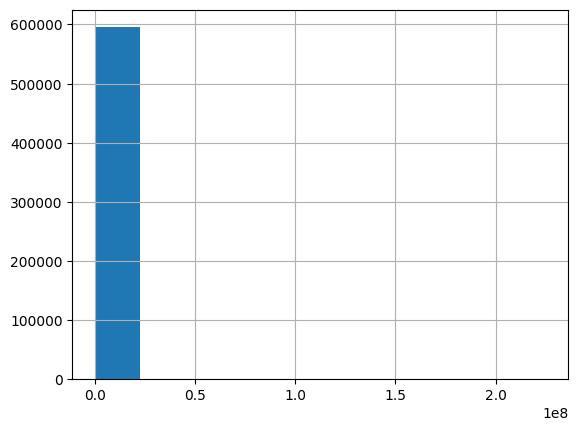

In [65]:
#Plot histogram for Price
df['Price'].hist()

The histogram for Price(€) shows that most of the data is below €50,000,000.   So much so that only one bin is visible which does not tell us much about the distribution of the data.   This could suggest that there are a number of outliers spread out across a range of roughly €50,000,000 - €250,000,000

<Axes: >

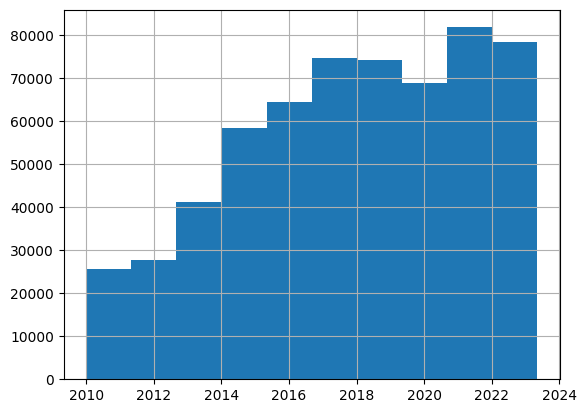

In [66]:
#Plot histogram for date of sale
df['DateofSale'].hist()

The DateofSale(dd/mm/yyyy) histogram shows most sales occured around 2022-2023.

- Plot box plots for all the continuous features.


<Axes: >

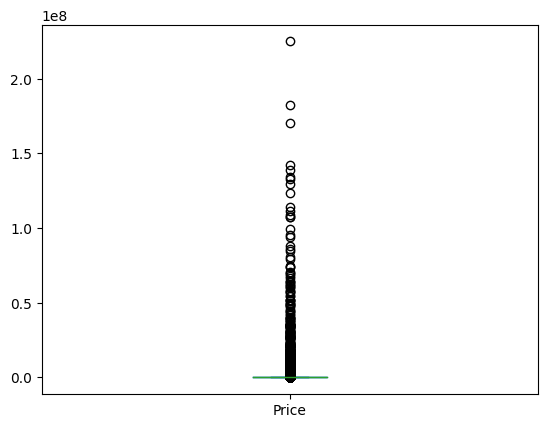

In [67]:
#Plot boxplot for Price
df['Price'].plot(kind='box')

The boxplot of Price(€) shows a large number of outliers with a large price range.

- Plot bar plots for all the categorical features.


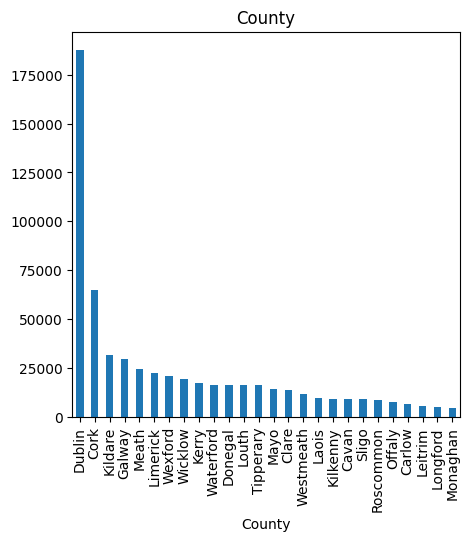

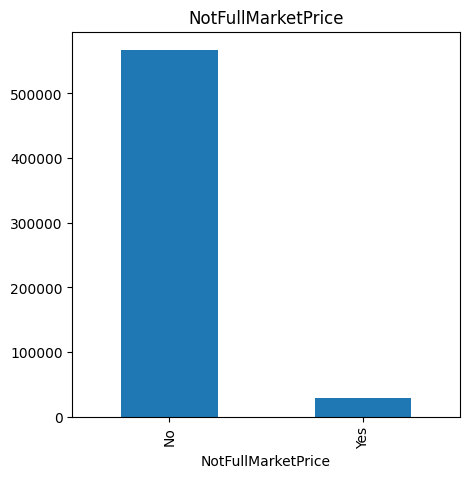

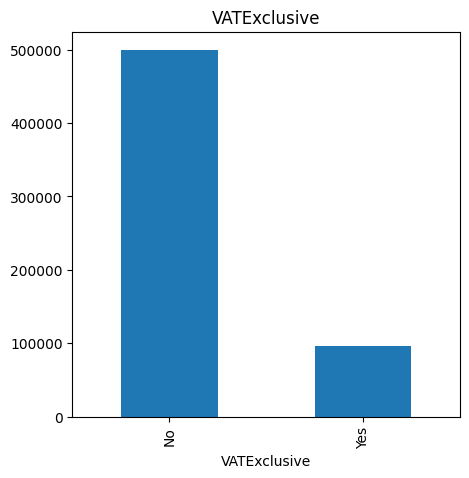

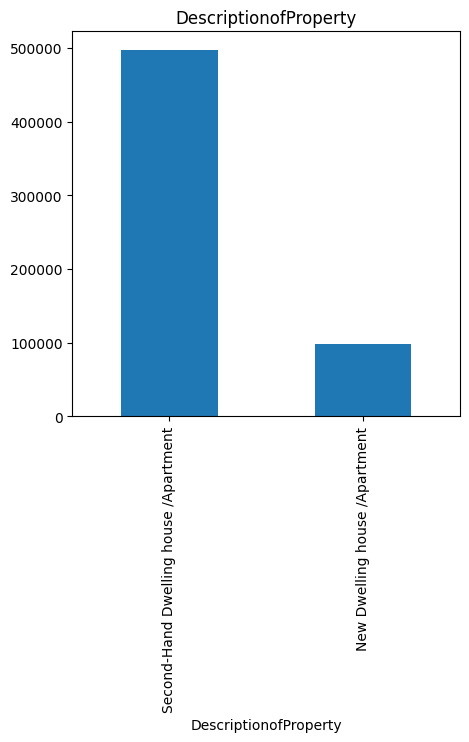

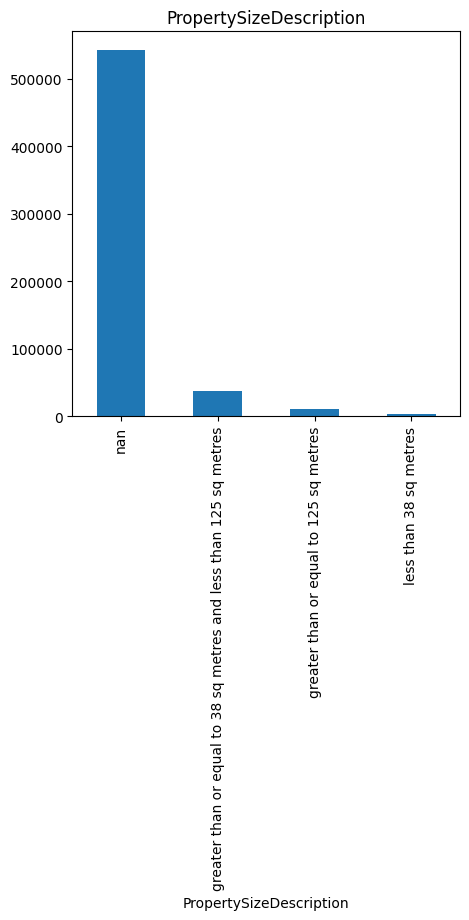

In [68]:
object_columns = df.select_dtypes(['category']).columns

# loop over categorical columns and print a bar chart for each
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
    plt.show()



- Discuss your initial findings.

The significant bar charts above are the following:

County
- Here we can clearly see that the most common addresses are in Dublin, with the next most common is Cork. These are the two most populous counties in Ireland and it would make sense for them to have the most properties sold, although it is interesting that Dublin sales are over double the amount of Cork sales.

DescriptionofProperty
 - It appears over 80% of properties sold are a Second-Hand Dwelling house/appartment. This would suggest that the number of new homes being built is quite low compared to available housing.

PropertySizeDescription
- The most common properties have a range of size between 38 sq metres and less than 125 sq metres. However, most of the data is missing from this feature, which will be addressed in the data quality report.

### Detailed report of initial findings in accompanying file:  <i> Data_Quality_Report_Initial_Findings.pdf </i> 

## 2 - Prepare a data quality plan for the cleaned CSV file.

<b> - Mark down all the features where there are potential problems or data quality issues. </b>

As outlined in the accompanying pdf containing the data quality report the following problems have been identified with the data:

    - Missing values in Eircode column
    - Missing values in PropertySizeDescription column
    - Outliers in Price(€) data

<b> - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
potentially many other. It is very important to provide justification for your thinking in this part and to  list potential solutions, including the solution that will be implemented to clean the data. </b>


1. <u>“Missing values in Eircode column"</u>

Upon first inspection, there appears to be post code data within Address data of some rows.   I will inspect the Address data further and try to extract PostCode data from the Address column.   This will not be applicable for all rows since PostalCode data appear to be Dublin post codes and not EirCodes.  

Initially I considered dropping this column as PostalCode data is missing from over 81% of rows and is only relevent to Dublin addresses.   I have decided not to drop it since it could provide useful information on Dublin house prices and Dublin addresses are the most frequent in the data accounting for over 30%.

3. <u>“Missing values in PropertySizeDescription column"</u>

This data is missing 89% of data and could be considered reasonable to drop this column altogether.   However, I believe the count of non-empty rows of PropertySizeDescription is close to the frequency of 'New Dwelling house /Apartment'.   If this is true, it could contain useful information about newly built properties, and so I will investigate and see if there is a correlation between rows with 'New Dwelling house /Apartment' and non-empty PropertySizeDescription to see if any action needs to be taken.

4. <u>“Outliers in Price(€) data"</u>

I will investigate the outliers and see if any action needs to be taken.



<b> - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. </b>

1. <u>“PostalCodes entered for counties other than Dublin"</u>


We need to check which addresses are outside of Dublin but have a Dublin post code, and remove the post code data.

In [1018]:
#check the 3 addresses outside Dublin with non empty postal codes
df[(df['County'] != 'Dublin') & (df['PostalCode'].notnull())]

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
3284,2019-12-20,"CULLEENANORY, CURRAGHROE, CO. ROSCOMMON",Dublin 24,Roscommon,42000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4519,2021-05-08,"3 STAG PARK CLOSE, STAG PARK, MITCHELSTOWN",Dublin 10,Cork,150000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9788,2021-10-28,"9 SPRINGVIEW TERRACE, COMMONS RD, CORK",Dublin 2,Cork,170000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [1019]:
#remove postal code data for these rows
for i in range(0, len(df)):
    if (df['County'][i] != 'Dublin') & (pd.notnull(df.loc[i, 'PostalCode'])):
        df['PostalCode'][i] = np.nan

In [1020]:
#check data has been removed
df['PostalCode'][4519]

nan

2. <u>“Missing values in PostalCode column"</u>


Here I will use the Address column to look for Dublin area codes to fill in missing Postal Code data.

In [1021]:
#Check rows with no post code data
df[df['PostalCode'].isnull()]

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2020-07-10,"62 CHERRYHILL COURT, MAUDLIN RD, KELLS",NaN,Meath,182500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2018-02-05,"EMMET STREET, KILMALLOCK, CO LIMERICK",NaN,Limerick,52000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2018-04-23,"KILMULLEN, NEWTOWNMOUNTKENNEDY",NaN,Wicklow,90000.0,No,No,New Dwelling house /Apartment,less than 38 sq metres
3,2021-07-27,"36 MARTIN SAVAGE PARK, DUBLIN 7",NaN,Dublin,390000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2021-07-19,"PINE VIEW, ABBEYDERG, KEENAGH",NaN,Longford,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
9995,2016-10-28,"LISMORRIS, CAHEREA, LISSYCASEY",NaN,Clare,275000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9996,2014-03-25,"3 ROCHFORD GREEN, BAKERS WALK, KILCOCK",NaN,Kildare,137000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9997,2010-03-31,"NO 10 150 HOWTH ROAD, CLONTARF",NaN,Dublin,490000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9998,2021-11-19,"7 CLOISTER SQ, BLACKROCK, DUBLIN",NaN,Dublin,785000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


In [1022]:
#go through each row and check if the PostalCode data is empty.   If so, check if any of the possible postal codes are
#in the Address.   If there is, add that postal code to the row.
for i in range(0, len(df)):
    if pd.isnull(df.loc[i, 'PostalCode']):
        for post in df['PostalCode'].unique():
            if str(post).replace(' ', '').lower() in df['Address'][i].replace(' ', '').lower():
                df['PostalCode'][i] = post


In [1023]:
#check rows with Dublin as the county and the postal code is empty to see if it worked
df[(df['County'] == 'Dublin') & (df['PostalCode'].isnull())] 

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
19,2012-12-10,"31 ROYAL TERRACE WEST, DUN LAOGHAIRE",NaN,Dublin,870000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
24,2017-10-03,"31 BOROIMHE HAZEL, SWORDS, DUBLIN",NaN,Dublin,430000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
43,2019-04-10,"25 KENURE GATE, PARK ROAD, RUSH",NaN,Dublin,334801.76,No,Yes,New Dwelling house /Apartment,NaN
45,2021-04-14,"38 TYRELLSTOWN BOULEVARD, THE BELGREE, TYRELLS...",NaN,Dublin,263000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
59,2017-12-15,"32 BRACKENWOOD AVE, BALBRIGGAN, DUBLIN",NaN,Dublin,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
9986,2020-01-14,"9 AMBERLEY COURT, STILLORGAN PARK AVENUE, BLAC...",NaN,Dublin,925110.00,No,Yes,New Dwelling house /Apartment,NaN
9988,2015-01-09,"34 AVOCA PARK, BLACKROCK, DUBLIN",NaN,Dublin,1017500.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9997,2010-03-31,"NO 10 150 HOWTH ROAD, CLONTARF",NaN,Dublin,490000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
9998,2021-11-19,"7 CLOISTER SQ, BLACKROCK, DUBLIN",NaN,Dublin,785000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


In [1024]:
#Check all rows with empty PostalCode data
df[df['PostalCode'].isnull()]

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2020-07-10,"62 CHERRYHILL COURT, MAUDLIN RD, KELLS",NaN,Meath,182500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2018-02-05,"EMMET STREET, KILMALLOCK, CO LIMERICK",NaN,Limerick,52000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2018-04-23,"KILMULLEN, NEWTOWNMOUNTKENNEDY",NaN,Wicklow,90000.0,No,No,New Dwelling house /Apartment,less than 38 sq metres
4,2021-07-19,"PINE VIEW, ABBEYDERG, KEENAGH",NaN,Longford,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5,2018-09-24,"95 LYNWOOD PARK, BALLYSIMON, LIMERICK",NaN,Limerick,165000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
9995,2016-10-28,"LISMORRIS, CAHEREA, LISSYCASEY",NaN,Clare,275000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9996,2014-03-25,"3 ROCHFORD GREEN, BAKERS WALK, KILCOCK",NaN,Kildare,137000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9997,2010-03-31,"NO 10 150 HOWTH ROAD, CLONTARF",NaN,Dublin,490000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9998,2021-11-19,"7 CLOISTER SQ, BLACKROCK, DUBLIN",NaN,Dublin,785000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


3. <u>“Missing values in PropertySizeDescription column"</u>


Here I will check if rows with nonempty PropertySizeDescription data are related to rows that are new addresses.

In [1025]:
#Check amount of addresses with a description of the property size
df['PropertySizeDescription'].notnull().sum()

1057

In [1026]:
#check amount of new addresses vs second hand addresses
df['DescriptionofProperty'].value_counts()

Second-Hand Dwelling house /Apartment    8307
New Dwelling house /Apartment            1693
Name: DescriptionofProperty, dtype: int64

In [1027]:
#check total amount of rows with a description of the property size that are new properties
((df['PropertySizeDescription'].notnull()) & (df['DescriptionofProperty'] == 'New Dwelling house /Apartment')).sum()

1057

We can see that the number of rows with both a nonempty PropertySizeDescription and DescriptionofProperty value of 'New Dwelling house /Apartment' is equal to the same number of rows that have a nonempty PropertySizeDescription.   This means that all information regarding property size is in relation to new houses.

In [1028]:
#check total amount of rows with a description of the property size that are new properties
new_size_missing_sum = ((df['PropertySizeDescription'].isnull()) & (df['DescriptionofProperty'] == 'New Dwelling house /Apartment')).sum()

#prepare %missing column
new_house_size_missing  = 100 * (new_size_missing_sum/df[(df['DescriptionofProperty'] == 'New Dwelling house /Apartment')].shape[0])

#assign 2 variables as the number of new addresses with empty and nonempty data with regards to the property size
empty = [new_house_size_missing] 
nonempty = [100 - new_house_size_missing]

# store the values in a dataframe
df_new_house_size_missing = pd.DataFrame(empty, columns=['%SizeDescription missing from New Dwelling house'])
df_new_house_size_not_missing = pd.DataFrame(nonempty, columns=['%SizeDescription not missing from New Dwelling house'])

#concatenate the two dataframes
df_new_house_size = pd.concat([df_new_house_size_missing,df_new_house_size_not_missing], axis = 1)

#display percentage of new addresses with a size description vs no size description
df_new_house_size

,%SizeDescription missing from New Dwelling house,%SizeDescription not missing from New Dwelling house
0,37.56645,62.43355


Over 62% of new homes contain information about the size of the property.   This is may be useful in the analysis of newly built homes and so I will not drop the PropertySizeDescription column.

4. <u>“DateofSale(dd/mm/yyyy) wrong dates entered and bias for months of Current Year"</u>


Here I will remove rows with a date of sale in 2022

In [1029]:
#check number of rows and columns
df.shape

(10000, 9)

In [1030]:
#go through each row and check the year of the date of sale.   Drop the row if it is in 2022.
date_current = []
for row in range(0, len(df)):
    if pd.DatetimeIndex(df['DateofSale(dd/mm/yyyy)']).year[row] == 2022:
        date_current += [row]

df = df.drop(labels=date_current, axis=0)

In [1031]:
#re-check rows and columns to see how many rows were dropped
df.shape

(9996, 9)

A total of 4 rows had a date of sale in the year 2022 and were dropped from the dataframe.   This should provide a better idea of how each month compares in terms of sales. 

5. <u>“Outliers in Price(€) data"</u>

I will investigate the outliers and see if any action needs to be taken.

There are a number of high outliers in Price(€) data.   The majority of the data is below €10,000,000 and a number of outliers above this range increase the amount of bins in the histogram, making it difficult to make any inference from the data.   It appears to be a small number of outliers with a high range.

I will begin by checking the 99th percentile of data.

In [1032]:
price_data = df['Price(€)']

#check the price threshold of the highest 99% of prices and the number of rows
p_99 = np.percentile(data, 99)
p_99_rows = (df['Price(€)'] < p_99).sum()
p_1_rows = df['Price(€)'].size - (df['Price(€)'] < p_99).sum()

#print the results
print("99% of data is <= " + str(p_99) + ', containing ' + str(p_99_rows) + ' rows')
print("Top 1% percent of data is <= " + str(p_99) + ', containing ' + str(p_1_rows) + ' rows')

99% of data is <= 1100000.0, containing 9880 rows
Top 1% percent of data is <= 1100000.0, containing 116 rows


In [1033]:
#check max price
price_data.max()

66431718.0

In [1]:
#check range of top 1%
price_data.max() - p_99

NameError: name 'price_data' is not defined

The top 1% of of prices are in the range €1,100,000 - €66,431,718.   This is a range of €65,331,718 which quite large.    I will check how many of the 116 rows in the top 1% are above €2,000,000.

In [1035]:
#check number of rows above €2,000,000
(price_data >= 2000000).sum()

41

This means 75 rows are in the price range of €1,100,000 - €2,000,000.   I will look at this data more closely

In [1036]:
#look at rows above €2,000,000
df[df['Price(€)'] >= 2000000]

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
466,2016-06-28,"OAKMOUNT, THE BIRCHES, FOXROCK",Dublin 18,Dublin,2150000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
706,2016-11-28,"19 PEMBROKE ROAD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,4016005.00,No,No,Second-Hand Dwelling house /Apartment,NaN
944,2016-06-01,"25 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,3525000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1263,2018-08-17,"1 2 3 4 5 6 BOROIMHE ASPEN COURT, FOREST LITTL...",NaN,Dublin,2600000.00,Yes,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
1584,2021-11-25,"19 GLENARA, KINCORA ROAD, CLONTARF",Dublin 3,Dublin,2200000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
1820,2014-07-24,"APARTMENTS 49-60 MARKER RESIDENCES, GRAND CANA...",Dublin 2,Dublin,5752466.40,No,No,Second-Hand Dwelling house /Apartment,NaN
1877,2013-04-25,"'GORTANORE', BRIGHTON ROAD, FOXROCK",Dublin 18,Dublin,5050000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2056,2018-03-26,"1 BLUE COURT, CONVENT RD, DUBLIN",NaN,Dublin,2180000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2438,2017-08-09,"APT 1, 11 TO 12 SUNBURY GARDENS, DARTRY RD DUB...",Dublin 6,Dublin,2350000.00,No,No,Second-Hand Dwelling house /Apartment,NaN
2509,2014-06-06,"19 PALMERSTOWN PARK, RATHMINES, DUBLIN 6",Dublin 6,Dublin,2250000.00,No,No,Second-Hand Dwelling house /Apartment,NaN


We can see from the Address column that some of these properties are apartment blocks.   It makes sense to drop these rows since they are significant outliers in the data and it does not make sense to count multiple residences as single properties.   

In [1037]:
#check number of columns and rows
df.shape

(9996, 9)

In [1038]:
#numbers of rows that are apartments or multiple units
apts = [1263, 1820, 2438, 3603, 4174, 4746, 6387, 6621, 6938, 7078, 7333, 8282, 8642, 9749, 8292]

#drop these rows
df = df.drop(labels=apts, axis=0)

In [1039]:
#check rows have been dropped
df.shape

(9981, 9)

In [1040]:
#reset row numbers
df.reset_index(drop=True, inplace=True)

In [1041]:
#check new highest price
df[df['Price(€)'] == df['Price(€)'].max()]

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
1875,2013-04-25,"'GORTANORE', BRIGHTON ROAD, FOXROCK",Dublin 18,Dublin,5050000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


Only 1% of price is above the range €1,200,000 which is well below my original estimate of €10,000,000.   It makes sense to remove outliers above €1,200,000 solely for the purpose of viewing both the histogram and box plot in order to better understand the data.

In [1042]:
#clamp data to 99%
data_clamped = price_data.clip(lower=data.quantile(0.01), upper=data.quantile(0.99))

<AxesSubplot:>

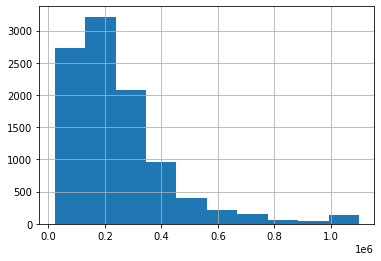

In [1043]:
#show the clamped price data as a histogram
data_clamped.hist()

<AxesSubplot:>

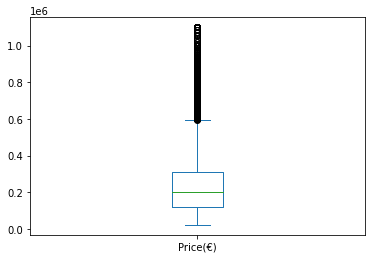

In [1044]:
#show the clamped price data as a boxplot
data_clamped.plot(kind='box')

Viewing the clamped data as a histogram, we can see that Price data is negatively skewed.   From the boxplot we can still see there are outliers but we have a better understanding of the interquartile range and median compared to the maximum and minimum prices.   The median price for a property appears to be around €200,000.

In [1045]:
#re-check feature types to see if any need to be changed
df.dtypes

DateofSale(dd/mm/yyyy)     datetime64[ns]
Address                          category
PostalCode                       category
County                           category
Price(€)                          float64
NotFullMarketPrice               category
VATExclusive                     category
DescriptionofProperty            category
PropertySizeDescription          category
dtype: object

In [1046]:
#check first 10 rows
df.head(10)

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription
0,2020-07-10,"62 CHERRYHILL COURT, MAUDLIN RD, KELLS",NaN,Meath,182500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2018-02-05,"EMMET STREET, KILMALLOCK, CO LIMERICK",NaN,Limerick,52000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2018-04-23,"KILMULLEN, NEWTOWNMOUNTKENNEDY",NaN,Wicklow,90000.0,No,No,New Dwelling house /Apartment,less than 38 sq metres
3,2021-07-27,"36 MARTIN SAVAGE PARK, DUBLIN 7",Dublin 7,Dublin,390000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,2021-07-19,"PINE VIEW, ABBEYDERG, KEENAGH",NaN,Longford,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
5,2018-09-24,"95 LYNWOOD PARK, BALLYSIMON, LIMERICK",NaN,Limerick,165000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
6,2018-12-06,"2 CAMDEN COURT, CARROLLS QUAY, CORK",NaN,Cork,100000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
7,2019-06-14,"36 EMERALD SQ, CORK ST, DUBLIN 8",Dublin 8,Dublin,235000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
8,2014-09-30,"10 KNOCKNALYRE, SLIGO RD, BALLINA",NaN,Mayo,125500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
9,2011-11-05,"109 PAIRC NA GCAPALL, KILWORTH",NaN,Cork,200000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...


### Summary of data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| DateofSale(dd/mm/yyyy)             | Irrelevent Data               | Drop Rows                      |
| Address                            | ----                          | ----                           |
| PostalCode                         | Wrong Values                  | Delete Values                  |
| PostalCode                         | Missing Values                | Extract From Address           |
| County                             | ----                          | ----                           |
| Price(€)                           | Outliers                      | Drop rows                      |
| NotFullMarketPrice                 | ----                          | ----                           |
| VATExclusive                       | ----                          | ----                           |
| DescriptionofProperty              | ----                          | ----                           |
| PropertySizeDescription            | Missing Values                | ----                           |




<b> - Save the new CSV file with a self explanatory name. </b>  

In [1047]:
#saving cleaned dataframe to a csv
df.to_csv("ppr-13391711_cleaned_section2.csv")

<b> - Save the data quality plan to a single PDF file. </b>

## 3 - Exploring relationships between feature pairs

<b> Choose a subset of features you find promising and plot pairwise feature interactions

<b>Categorical vs Categorical</b>

First I will compare all of the categorical features I find promising with the DescriptionofProperty column.

In [1049]:
import matplotlib.patches as mpatches
# Function to generate Stacked Bar Charts for Categorical Columns from previous solution

def stacked_bar_chart(col):
    # will check the percentage of new vs old properties sold in the selected column by values in the column
    array = pd.unique(df[col].ravel())

    df['percent'] = 0

    for i in array:
        count = df[df[col] == i].count()['DescriptionofProperty']
        count_percentage = (1 / count) * 100
        print(i, "\t", count)
        index_list = df[df[col] == i].index.tolist()
        for ind in index_list:
            df.loc[ind, 'percent'] = count_percentage

    group = df[['percent', col, 'DescriptionofProperty']].groupby([df[col], 'DescriptionofProperty']).sum()

    my_plot = group.unstack().plot(kind='bar', stacked=True, title="Description of Property based on " + str(col) , figsize=(8,5))

    blue_patch = mpatches.Patch(color='blue', label='New Dwelling house /Apartment')
    red_patch = mpatches.Patch(color='orange', label='Second-Hand Dwelling house /Apartment')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    my_plot.set_xlabel(col)
    my_plot.set_ylabel("% DescriptionofProperty")
    my_plot.set_ylim([0,100])

    df.drop("percent", axis=1, inplace = True)



Meath 	 402
Limerick 	 390
Wicklow 	 354
Dublin 	 3159
Longford 	 72
Cork 	 1120
Mayo 	 243
Tipperary 	 261
Kerry 	 304
Offaly 	 107
Kildare 	 510
Kilkenny 	 167
Waterford 	 269
Sligo 	 159
Wexford 	 337
Donegal 	 245
Louth 	 238
Monaghan 	 75
Clare 	 235
Galway 	 463
Westmeath 	 185
Laois 	 155
Cavan 	 164
Carlow 	 124
Roscommon 	 159
Leitrim 	 84


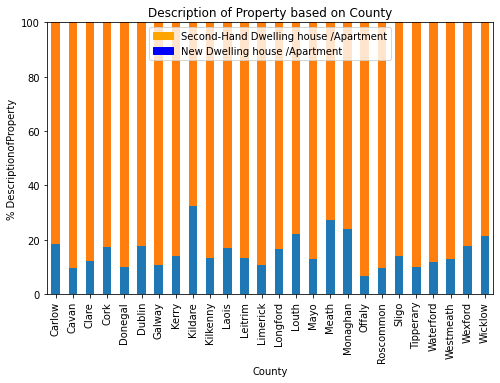

In [1050]:
#check new vs old homes sold based on county
stacked_bar_chart("County")

I suspected the highest proportion of new to old properties sold would be in either Dublin or Cork since they are the most the populous counties.   This does not appear to be the case as Kildare and Meath had the highest amount of new homes sold compared to second hand houses, both counties neighbouring Dublin.

/var/folders/bn/6x11zktd6n14vfwyb0jymgt00000gp/T/ipykernel_83811/3763161795.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  count_percentage = (1 / count) * 100


nan 	 0
Dublin 7 	 141
Dublin 8 	 130
Dublin 11 	 99
Dublin 15 	 240
Dublin 18 	 124
Dublin 3 	 71
Dublin 12 	 88
Dublin 14 	 86
Dublin 5 	 92
Dublin 9 	 118
Dublin 6w 	 22
Dublin 1 	 152
Dublin 4 	 134
Dublin 24 	 130
Dublin 6 	 140
Dublin 16 	 80
Dublin 17 	 22
Dublin 10 	 30
Dublin 13 	 96
Dublin 2 	 54
Dublin 22 	 55
Dublin 20 	 31


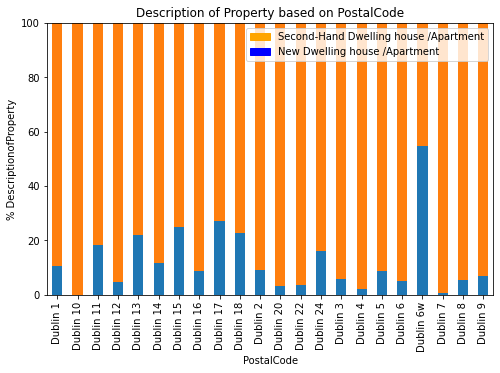

In [1051]:
#check new vs old homes sold in Dublin based on postal code
stacked_bar_chart("PostalCode")

Here we can see Dublin 6w has the largest proportion of new houses sold compared to second hand houses.   However, it has the joint lowest number of sales for a Dublin area, along with Dublin 17, which has the second highest proportion of new homes sold.   Dublin 15 has the highest amount of sales per Dublin area and has the third highest proportion of new homes build.

No 	 9499
Yes 	 482


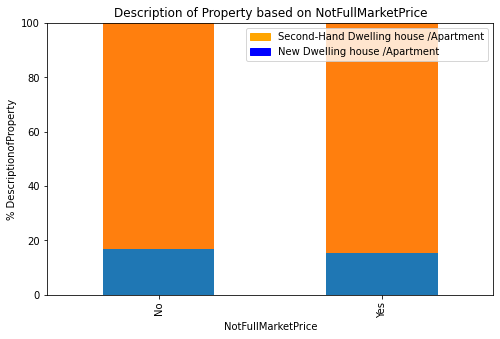

In [1052]:
#check new vs old homes based on whether they are sold for full market price
stacked_bar_chart("NotFullMarketPrice")

The number of new and second-hand properties sold for full market price is similar and so the age of the property does not appear to affect whether the seller will get full price for it.

No 	 8330
Yes 	 1651


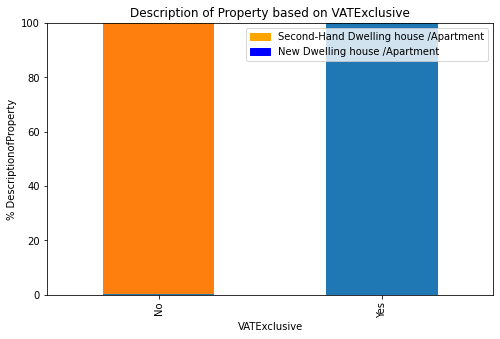

In [1053]:
#check new vs old homes based on whether their prices include VAT
stacked_bar_chart("VATExclusive")

The new properties do not have VAT included in the price. 

<b>Categorical vs Continuous

<AxesSubplot:title={'center':'Price(€)'}, xlabel='[DescriptionofProperty]'>

<Figure size 432x288 with 0 Axes>

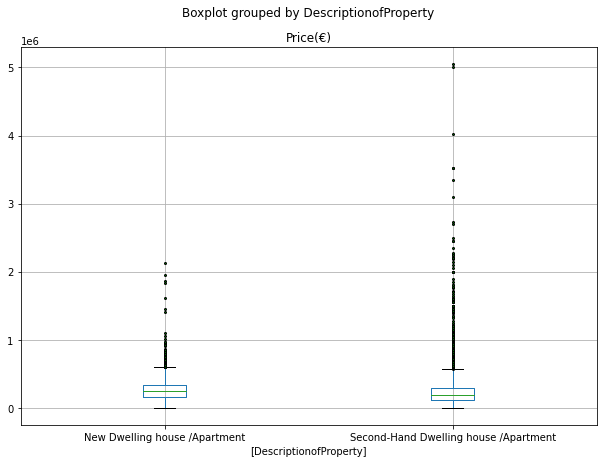

In [1054]:
# code for box plot found in sample answer

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
                  linestyle='none')
df.boxplot(column=['Price(€)'], by=['DescriptionofProperty'], flierprops=flierprops, figsize=(10,7))

The box plot above shows a similar interquartile range for price, while second-hand houses appear to have a higher number of outliers over a larger range.   This would suggest that price is not dependent on the age of the property, while there could be factors exclusive to second-hand houses that could cause a higher price, such as being located in desirable areas to live where new homes are not being built.

<AxesSubplot:title={'center':'Price(€)'}, xlabel='[PropertySizeDescription]'>

<Figure size 432x288 with 0 Axes>

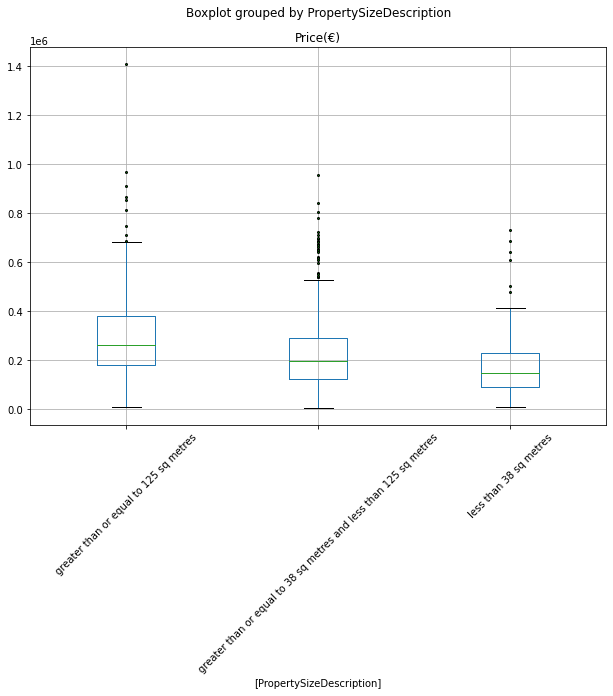

In [1055]:
# code for box plot found in sample answer

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
                  linestyle='none')
df.boxplot(column=['Price(€)'], by=['PropertySizeDescription'], rot=45, flierprops=flierprops, figsize=(10,7))

As expected, house size has an influence on the price, with smaller properties having a lower median price, while larger properties have the largest median price.   What is interesting is that medium sized properties have the highest amount of outliers, meaning other factors could influence price positively.   Outliers in price seem to suggest competitive buying, or high demand, meaning that other factors such as location influence prices.

<AxesSubplot:title={'center':'Price(€)'}, xlabel='[County]'>

<Figure size 432x288 with 0 Axes>

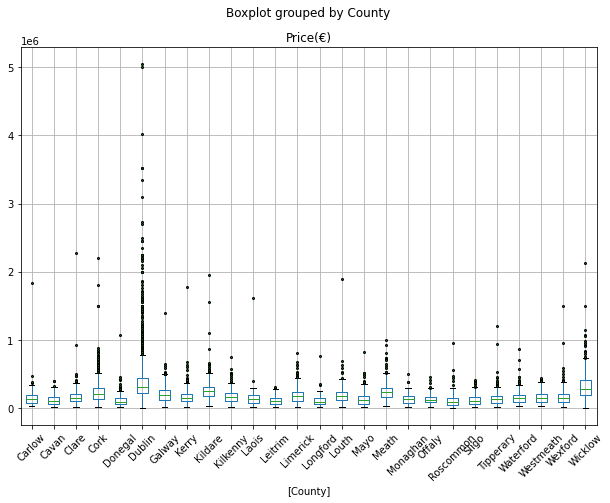

In [1056]:
# code for box plot found in sample answer

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
                  linestyle='none')
df.boxplot(column=['Price(€)'], by=['County'], rot=45, flierprops=flierprops, figsize=(10,7))

Dublin property prices have a larger interquartile range than any other county, and have the highest number of outliers meaning the demand for houses in the county is quite high, with a high variability in prices.   Wicklow's interquartile range is a close second with fewer outliers.   It may be useful to look at average prices for each county.

Text(0.5, 0, 'County')

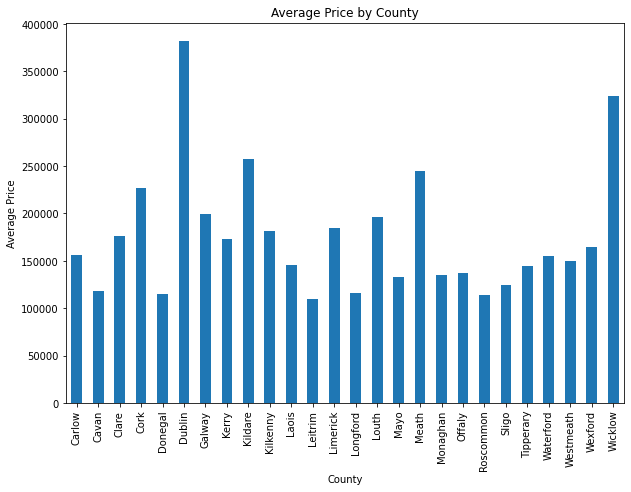

In [1057]:
plt.figure(figsize=(10,7))
df["Price(€)"].groupby(df['County']).mean().plot(kind='bar')
plt.title("Average Price by County")
plt.ylabel("Average Price")
plt.xlabel("County")

Here we can clearly see Dublin has the most expensive average price, with three neighbouring counties being the next highest, Wicklow, Kildare and Meath.   Cork, is the fourth highest, while not geographically close to Dublin, it is the second most populous county.   The average price per county seems to indicate that properties in, or close to, Dublin have the highest value.   

<AxesSubplot:title={'center':'Price(€)'}, xlabel='[PostalCode]'>

<Figure size 432x288 with 0 Axes>

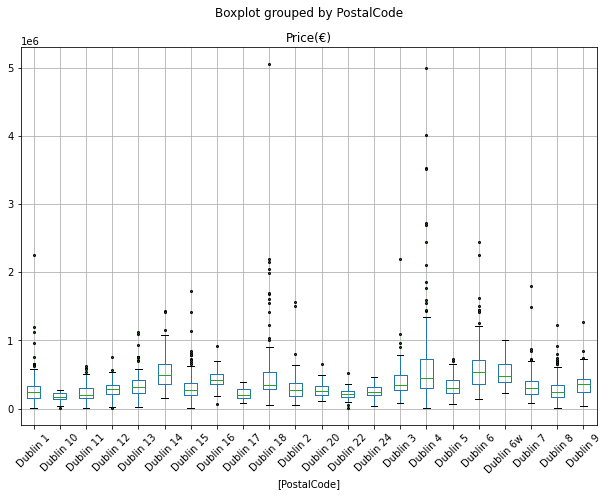

In [1058]:
# code for box plot found in sample answer

plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=2,
                  linestyle='none')
df.boxplot(column=['Price(€)'], by=['PostalCode'], rot=45, flierprops=flierprops, figsize=(10,7))

Dublin 4 appears to have the largest range of prices for Dublin properties, showing a high variability in price.   High outliers seem to suggest a high demand with buyers more than willing to pay a high price.   I will look at the average price per Dublin area to get a better understanding of Dublin property prices.

Text(0.5, 0, 'Dublin Area')

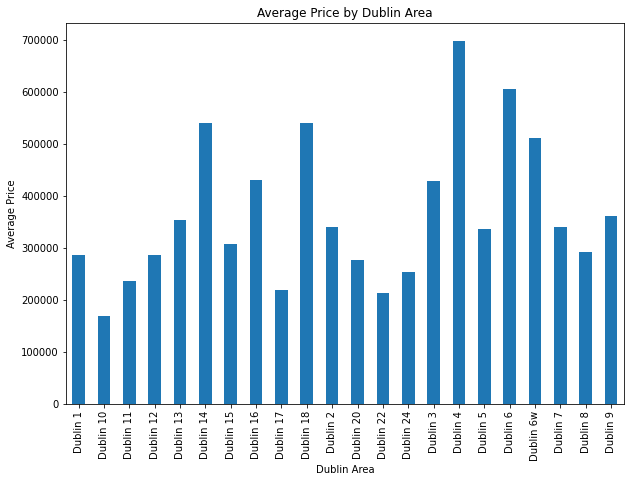

In [1059]:
plt.figure(figsize=(10,7))
df["Price(€)"].groupby(df['PostalCode']).mean().plot(kind='bar')
plt.title("Average Price by Dublin Area")
plt.ylabel("Average Price")
plt.xlabel("Dublin Area")

Here we can see Dublin 4 properties are the highest in Price, followed by Dublin 6, Dublin 14 and Dublin 18.   Interestingly, these are all areas south of the River Liffey.   The highest prices in the northside are located in Dublin 3, which has the 7th highest average price per area code.

<b> Discuss your findings from the plots above.

<u>Categorical vs Categorical: </u>
- Over 60% of properties sold since 2010 have been second-hand.   Dublin has the highest amount of properties sold, implying that there is a high demand for Dublin properties, yet it doesn't have one of the highest percentages of new houses sold.   The two counties with the rates for new properties are Kildare and Meath, which neighbour Dublin, which may suggest that if people can't get housing in Dublin, they will try live nearby.
- Dublin 15 appears to be a newly desirable area to live as it has the highest number of properties sold and the third highest rate of new properties sold in Dublin.
- The age of a property does not have an effect on whether a seller will get full market price for it.
- The prices of new properties do not have VAT included in the price.

<u>Categorical vs Continuous:</u>
- Their does not appear to be a relationship to the price of a property and its age.
- Property prices appear to increase with the size of the property.
- There appears to be a relationship between the price a property and its location in relation to Dublin, with surrounding counties have the next highest average prices per county after Dublin. 
- There appears to be a relationship between price and the area code of Dublin properties, with the 6 highest priced Dublin areas located south of the River Liffey.

## 4 - Transform, extend or combine the existing features to create a few new features

features:
- Month of Sale
- Year of Sale
- Geolocation

<b> Feature 1 </b>
    
The first feature I want to create is one which examines the month each address was sold.   It will be interesting to see if sales peak at a certain time of year. 

In [1060]:
#create a new column listing the month of each sale
df['MonthofSale'] = pd.DatetimeIndex(df['DateofSale(dd/mm/yyyy)']).month

In [1061]:
#check the column has been added by checking first 5 rows
df.head(5)

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription,MonthofSale
0,2020-07-10,"62 CHERRYHILL COURT, MAUDLIN RD, KELLS",NaN,Meath,182500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7
1,2018-02-05,"EMMET STREET, KILMALLOCK, CO LIMERICK",NaN,Limerick,52000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2
2,2018-04-23,"KILMULLEN, NEWTOWNMOUNTKENNEDY",NaN,Wicklow,90000.0,No,No,New Dwelling house /Apartment,less than 38 sq metres,4
3,2021-07-27,"36 MARTIN SAVAGE PARK, DUBLIN 7",Dublin 7,Dublin,390000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7
4,2021-07-19,"PINE VIEW, ABBEYDERG, KEENAGH",NaN,Longford,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7


Text(0.5, 1.0, 'Property Sales by month')

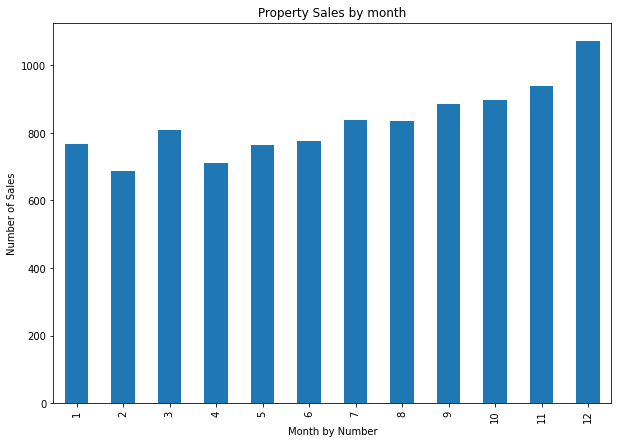

In [1062]:
#plot the number of sales per month to look for a trend
plt.figure(figsize=(10,7))
df['MonthofSale'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.ylabel('Number of Sales')
plt.xlabel('Month by Number')
plt.title('Property Sales by month')

It appears the amount of properties sold per month increases from April and peaks in December.

<b> Feature 2 </b>
    
The first feature I want to create is one which examines the year each address was sold.   I would like to see whether house prices changed from year to year. 

In [1063]:
#create a new column with the year of sale
df['YearofSale'] = pd.DatetimeIndex(df['DateofSale(dd/mm/yyyy)']).year

In [1064]:
#check the column has been added
df.head(5)

,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription,MonthofSale,YearofSale
0,2020-07-10,"62 CHERRYHILL COURT, MAUDLIN RD, KELLS",NaN,Meath,182500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2020
1,2018-02-05,"EMMET STREET, KILMALLOCK, CO LIMERICK",NaN,Limerick,52000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2,2018
2,2018-04-23,"KILMULLEN, NEWTOWNMOUNTKENNEDY",NaN,Wicklow,90000.0,No,No,New Dwelling house /Apartment,less than 38 sq metres,4,2018
3,2021-07-27,"36 MARTIN SAVAGE PARK, DUBLIN 7",Dublin 7,Dublin,390000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2021
4,2021-07-19,"PINE VIEW, ABBEYDERG, KEENAGH",NaN,Longford,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2021


Text(0.5, 0, 'Year of Sale')

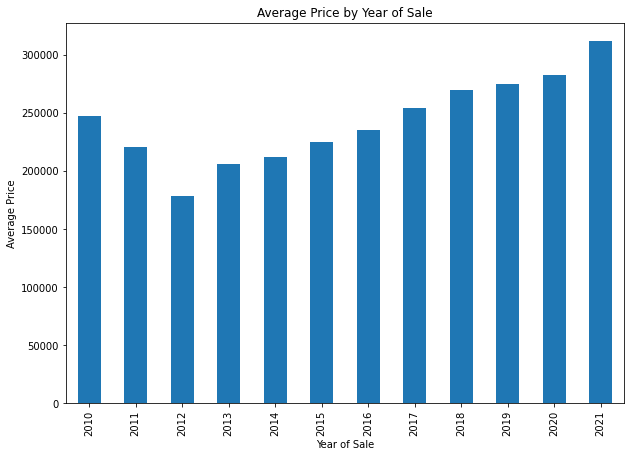

In [1065]:
#plot the mean price of properties sold per year to look for a trend
plt.figure(figsize=(10,7))
df["Price(€)"].groupby(df['YearofSale']).mean().plot(kind='bar')
plt.title("Average Price by Year of Sale")
plt.ylabel("Average Price")
plt.xlabel("Year of Sale")

We can see that the average property price in Ireland has been increasing since 2012.   Next I would like to check the proportion of new houses to second-hand houses sold each year.

2020 	 916
2018 	 1184
2021 	 1090
2019 	 1134
2014 	 860
2011 	 348
2016 	 955
2017 	 1083
2013 	 565
2012 	 517
2015 	 939
2010 	 390


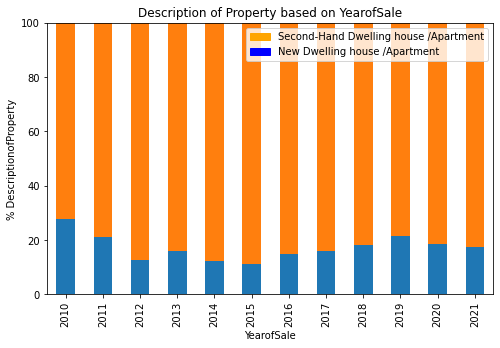

In [1066]:
#check proportion of new vs old homes sold in Dublin each year
stacked_bar_chart("YearofSale")

There does not seem to be much correlation between the rise of property prices and new houses sold.   My thinking was that rising property prices might be a result from a lack of new houses.   This does not appear to be the case. 

<b> Feature 3 </b>
    
The third feature I want to create is the geolocation of each address in Dublin.   I think it is useful to only look at Dublin data since it is the county with the highest property prices and the county we have the most data on.   We saw that South Dublin properties appear to have a higher average price and adding the geolocation of each address to the data allows for a more detailed view of how this price is affected by its location.   For this I wll add 2 columns for latitude and longitude.

In [1068]:
#import relevent packages
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from pprint import pprint
import requests
import json

#Creating an instance of Nominatim Class
geolocator = Nominatim(user_agent='my_request')
 
#applying the rate limiter wrapper
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

#create two new columns for latitude and longitude
df['Lat'] = np.nan
df['Lon'] = np.nan

#iterate through each row, find geolocation of address if the county is Dublin
for i in range(0, len(df)):
    if df['County'][i] == 'Dublin':
        addr = df['Address'][i]
        try:
            location = geolocator.geocode(addr).raw
            df['Lat'][i] = location.get('lat')
            df['Lon'][i] = location.get('lon')
        except:
            pass
        
#check rows with county as Dublin
df[df['County'] == 'Dublin']

/var/folders/bn/6x11zktd6n14vfwyb0jymgt00000gp/T/ipykernel_83811/2454369706.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lat'][i] = location.get('lat')
/var/folders/bn/6x11zktd6n14vfwyb0jymgt00000gp/T/ipykernel_83811/2454369706.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lon'][i] = location.get('lon')


,DateofSale(dd/mm/yyyy),Address,PostalCode,County,Price(€),NotFullMarketPrice,VATExclusive,DescriptionofProperty,PropertySizeDescription,MonthofSale,YearofSale,Lat,Lon
3,2021-07-27,"36 MARTIN SAVAGE PARK, DUBLIN 7",Dublin 7,Dublin,390000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2021,53.374543,-6.331248
7,2019-06-14,"36 EMERALD SQ, CORK ST, DUBLIN 8",Dublin 8,Dublin,235000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2019,NaN,NaN
10,2016-05-08,"7 CASEMENT GREEN, FINGLAS WEST, DUBLIN 11",Dublin 11,Dublin,156000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2016,53.394342,-6.308681
12,2021-02-03,"BLOCK 7A, 3 ANNALY CLOSE, ONGAR LODGE DUBLIN 15",Dublin 15,Dublin,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2,2021,NaN,NaN
13,2019-06-13,"135 OVAL, TULLYVALE, CABINTEELY DUBLIN 18",Dublin 18,Dublin,325000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2019,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9967,2020-01-14,"9 AMBERLEY COURT, STILLORGAN PARK AVENUE, BLAC...",NaN,Dublin,925110.0,No,Yes,New Dwelling house /Apartment,NaN,1,2020,NaN,NaN
9969,2015-01-09,"34 AVOCA PARK, BLACKROCK, DUBLIN",NaN,Dublin,1017500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,1,2015,53.293704,-6.188696
9978,2010-03-31,"NO 10 150 HOWTH ROAD, CLONTARF",NaN,Dublin,490000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,3,2010,53.370464,-6.208622
9979,2021-11-19,"7 CLOISTER SQ, BLACKROCK, DUBLIN",NaN,Dublin,785000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2021,53.291293,-6.184619


In [1069]:
#check number of rows with a geolocation
df['Lat'].notnull().sum()

1175

The geolocation of some addresses weren't found and so we still have missing coordinates for Dublin addresses.   A quick google shows that this happens from time to time using geopy and so I will use the data I have rather than drop the new features.   Since we are looking at Dublin addresses only, I will calculate new percentiles for this price data.   Using this data, I will pin each address to a map and use colors to highlight each price category they fall under.

In [1070]:
#calculate percentiles and median for Dublin property prices
dublin_data = df[df['County'] == 'Dublin']['Price(€)']
                 
p_25 = np.percentile(dublin_data, 25)
p_50 = np.median(dublin_data)
p_75 = np.percentile(dublin_data, 75)
print(p_25, p_50, p_75)

215000.0 310000.0 442000.0


In [1071]:
import folium

#new list for index of rows with latitude and longitude data
geo = []

#new map
m = folium.Map(location = [53.3498, -6.2603], zoom_start = 10)

#add row indexes to list
for i in range(0,len(df)):
    if pd.notnull(df.loc[i, 'Lat']):
        geo += [i]

#iterate through rows in geo list, check the price range of each address and pin to the map
for coord in geo:
    if df['Price(€)'][coord] <= p_25:
        color = 'blue'
    elif p_25 < df['Price(€)'][coord] <= p_50:
        color = 'green'
    elif p_50 < df['Price(€)'][coord] <= p_75:
        color = 'orange'
    elif df['Price(€)'][coord] > p_75:
        color = 'red'
    tooltip = df['Address'][coord]
    folium.Marker([df['Lat'][coord], df['Lon'][coord]], popup = f"<strong>coord</strong>", tooltip = tooltip, icon = folium.Icon(color = color)).add_to(m)
 
#display map
m

Here we have a better view of Dublin property prices.   Most of the properties above or equal to the 75th percentile in price appear to be South Dublin.   Most properties within this price range appear to be closer to the coast, regardless of whether the area is North or South of the River Liffey.

In [1072]:
#saving cleaned dataframe to a csv
df.to_csv("ppr-13391711_cleaned_section4.csv")